# Creating and Backtesting simple Momentum/Contrarian Strategies

## Getting the Data

In [ ]:
# 모멘텀 전략 : 가장 최신의 모멘텀이 지속된다고 가정, 현재 시점으로부터 과거 몇개의 봉의 추세를 가지고 판단
# 단순 역투자 전략 : 가장 최신의 추세가 유지되지 않고 시장이 반대로 갈 거라고 가정, 가장 최신봉 양봉->상품 매수

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_95542/4095138375.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [37]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [38]:
data.head()

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2070 entries, 2018-01-01 22:00:00+00:00 to 2019-12-30 22:00:00+00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2070 non-null   float64
dtypes: float64(1)
memory usage: 32.3 KB


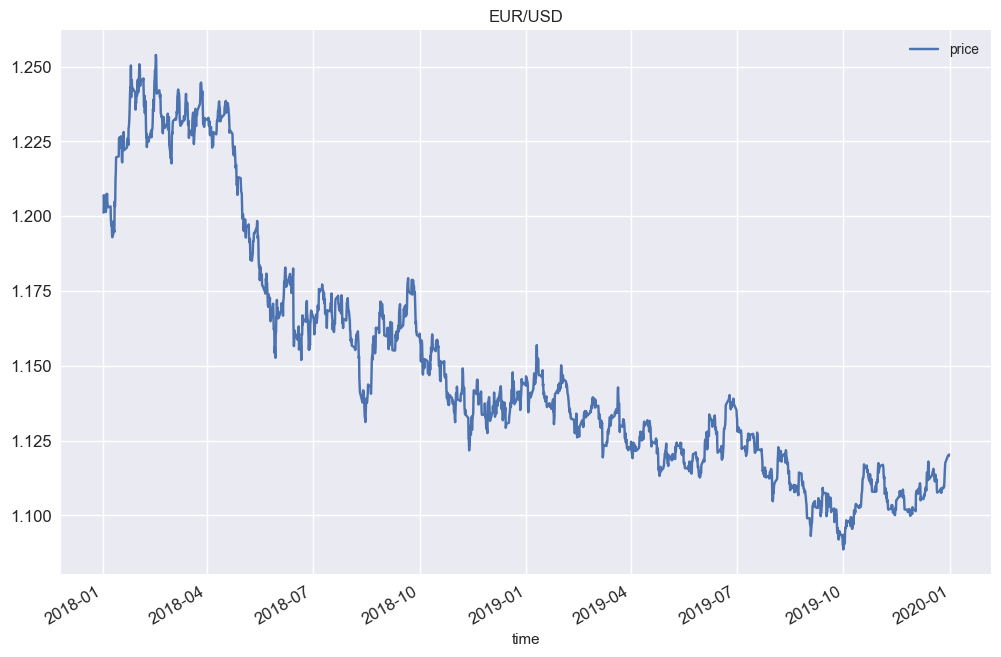

In [40]:
data.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

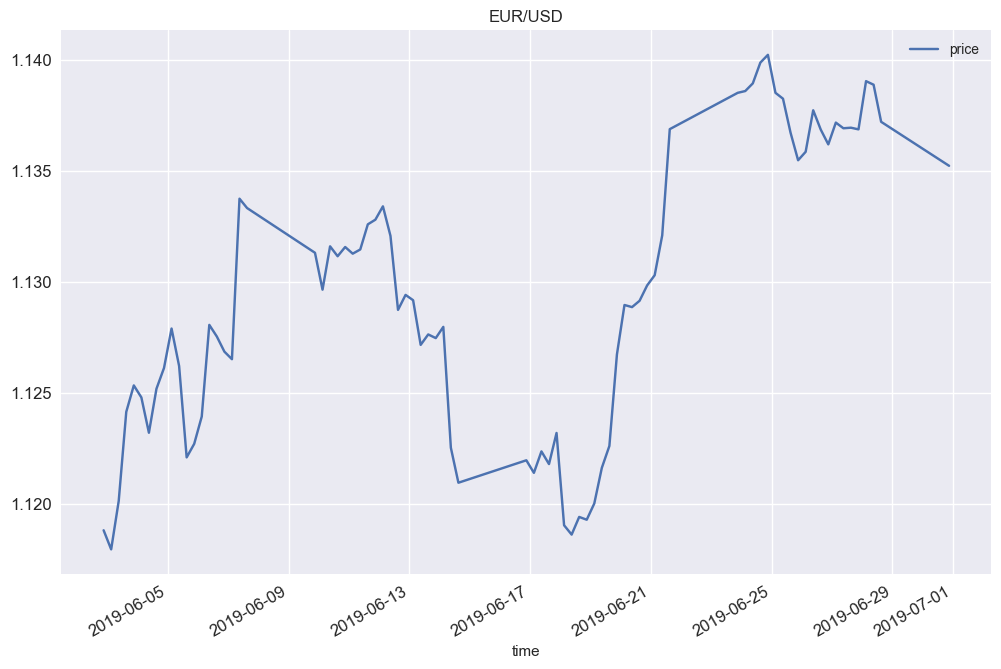

In [41]:
data.loc["2019-06"].plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

In [42]:
data["returns"] = np.log(data.div(data.shift(1)))

In [43]:
data.dropna(inplace = True)

In [44]:
data.head()

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718


## Defining a simple Contrarian Strategy (window = 3)

In [45]:
window = 3

In [46]:
data.head()

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718


In [47]:
data["returns"].rolling(window).mean().head() # 3일간 평균 수익률

time
2018-01-02 04:00:00+00:00         NaN
2018-01-02 10:00:00+00:00         NaN
2018-01-02 16:00:00+00:00    0.001273
2018-01-02 22:00:00+00:00   -0.000654
2018-01-03 04:00:00+00:00   -0.000170
Name: returns, dtype: float64

In [48]:
# 역투자 전략 : window size 만큼의 평균 수익률과 반대로 갈 것이라고 예상
data["position"] = -np.sign(data["returns"].rolling(window).mean()) # contrarian (minus sign)

In [49]:
data.head() # 평균 수익률 양수(+1) -> 매수 , 평균 수익률 음수(-1) -> 매도

,price,returns,position
time,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0


## Vectorized Strategy Backtesting

In [50]:
data["strategy"] = data.position.shift(1) * data["returns"] # 포지션 * 일일 수익률

In [51]:
data.head()

,price,returns,position,strategy
time,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718


In [52]:
data.dropna(inplace = True)

In [53]:
data.head()

,price,returns,position,strategy
time,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004


In [54]:
data[["returns", "strategy"]].sum()

returns    -0.073498
strategy    0.096236
dtype: float64

In [55]:
data[["returns", "strategy"]].sum().apply(np.exp)

returns     0.929138
strategy    1.101019
dtype: float64

In [56]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [59]:
data.head(10)

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229
2018-01-04 04:00:00+00:00,1.204300,0.002369,-1.0,0.002369,0.998756,1.000597
2018-01-04 10:00:00+00:00,1.207440,0.002604,-1.0,-0.002604,1.001360,0.997995
2018-01-04 16:00:00+00:00,1.206830,-0.000505,-1.0,0.000505,1.000854,0.998500
2018-01-04 22:00:00+00:00,1.207470,0.000530,-1.0,-0.000530,1.001385,0.997970


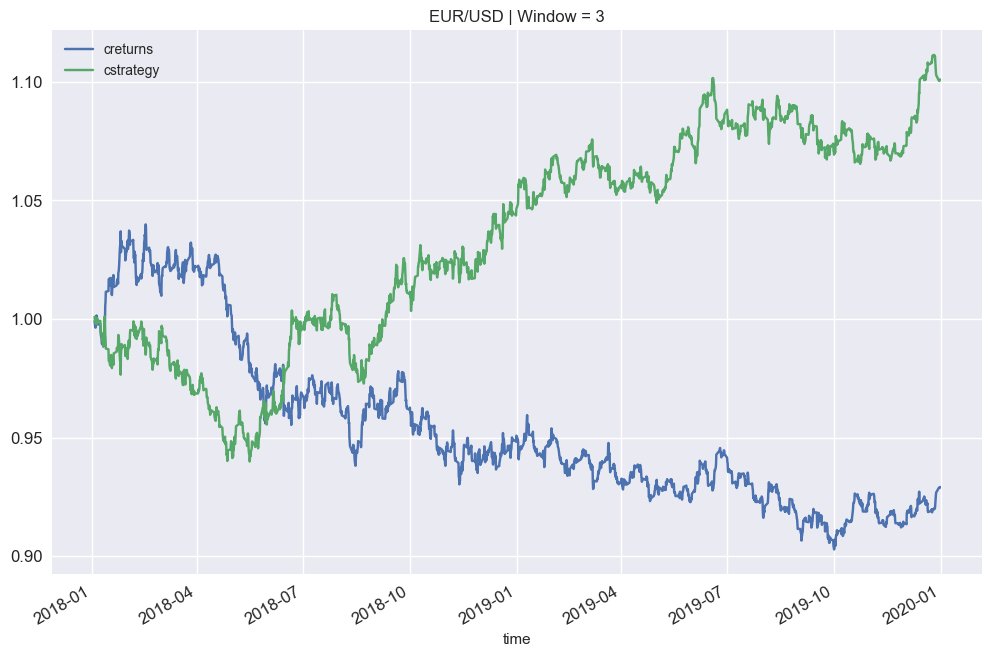

In [60]:
data[["creturns", "cstrategy"]].plot(figsize = (12 , 8),
                                     title = "EUR/USD | Window = {}".format(window), fontsize = 12)
plt.show()

## Changing the window parameter

In [61]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [62]:
data.head()

,price
time,
2018-01-01 22:00:00+00:00,1.201205
2018-01-02 04:00:00+00:00,1.207055
2018-01-02 10:00:00+00:00,1.204440
2018-01-02 16:00:00+00:00,1.205800
2018-01-02 22:00:00+00:00,1.204690


In [63]:
data["returns"] = np.log(data.div(data.shift(1)))

In [64]:
data.dropna(inplace = True)
data.head()

,price,returns
time,,
2018-01-02 04:00:00+00:00,1.207055,0.004858
2018-01-02 10:00:00+00:00,1.204440,-0.002169
2018-01-02 16:00:00+00:00,1.205800,0.001129
2018-01-02 22:00:00+00:00,1.204690,-0.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718


In [65]:
to_plot = ["returns"]

In [66]:
for w in [1, 2, 3, 5, 10]:
    data["position{}".format(w)] = -np.sign(data["returns"].rolling(w).mean())
    data["strategy{}".format(w)] = data["position{}".format(w)].shift(1) * data["returns"]
    to_plot.append("strategy{}".format(w))

In [69]:
data.head(10)

,price,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.001129,1.0,-0.001129,-1.0,NaN,NaN,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,-1.0,-0.000921,1.0,0.000921,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.000718,1.0,-0.000718,-1.0,NaN,NaN,NaN
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,1.0,-0.001222,1.0,-0.001222,1.0,0.001222,NaN,NaN
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,1.0,-0.000757,1.0,-0.000757,1.0,-0.000757,NaN,NaN
2018-01-03 22:00:00+00:00,1.201450,0.000004,-1.0,0.000004,1.0,0.000004,1.0,0.000004,1.0,0.000004,NaN,NaN
2018-01-04 04:00:00+00:00,1.204300,0.002369,-1.0,-0.002369,-1.0,0.002369,-1.0,0.002369,1.0,0.002369,NaN,NaN


In [70]:
to_plot

['returns', 'strategy1', 'strategy2', 'strategy3', 'strategy5', 'strategy10']

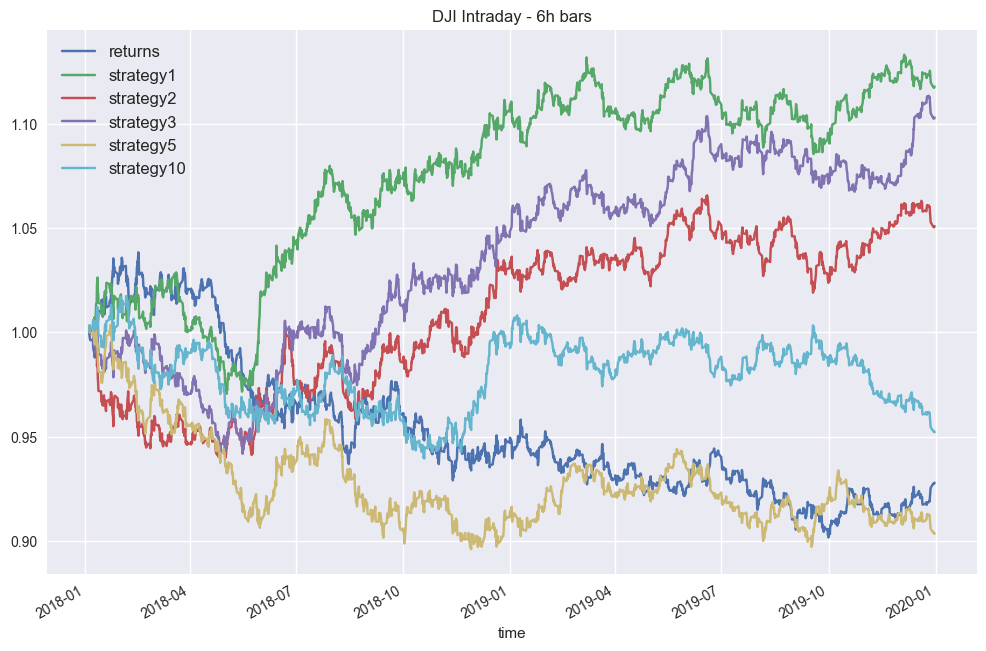

In [71]:
data[to_plot].dropna().cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.title("DJI Intraday - 6h bars", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [72]:
data.head()

,price,returns,position1,strategy1,position2,strategy2,position3,strategy3,position5,strategy5,position10,strategy10
time,,,,,,,,,,,,
2018-01-02 04:00:00+00:00,1.207055,0.004858,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,1.0,0.002169,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,0.001129,1.0,-0.001129,-1.0,NaN,NaN,NaN,NaN,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,-1.0,-0.000921,1.0,0.000921,NaN,NaN,NaN,NaN
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,1.0,0.000718,1.0,-0.000718,-1.0,NaN,NaN,NaN


In [ ]:
# 모멘텀 또는 역투자 전략은 포지션을 많이 바꾸기 때문에 거래 비용이 높다. 거래비용도 고려하여 window size도 고려해야 한다.

## Trades and Trading Costs (Part 1)

In [73]:
data = pd.read_csv("intraday.csv", parse_dates = ["time"], index_col = "time")

In [74]:
window = 3

In [75]:
data["returns"] = np.log(data.div(data.shift(1)))

In [76]:
data["position"] = -np.sign(data["returns"].rolling(window).mean())

In [77]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [78]:
data.head()

,price,returns,position,strategy
time,,,,
2018-01-01 22:00:00+00:00,1.201205,NaN,NaN,NaN
2018-01-02 04:00:00+00:00,1.207055,0.004858,NaN,NaN
2018-01-02 10:00:00+00:00,1.204440,-0.002169,NaN,NaN
2018-01-02 16:00:00+00:00,1.205800,0.001129,-1.0,NaN
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921


In [79]:
data.dropna(inplace = True)

In [80]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)

In [83]:
data.tail()

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.0,0.000156,0.928778,1.100591
2019-12-30 22:00:00+00:00,1.120355,0.000388,-1.0,0.000388,0.929138,1.101019


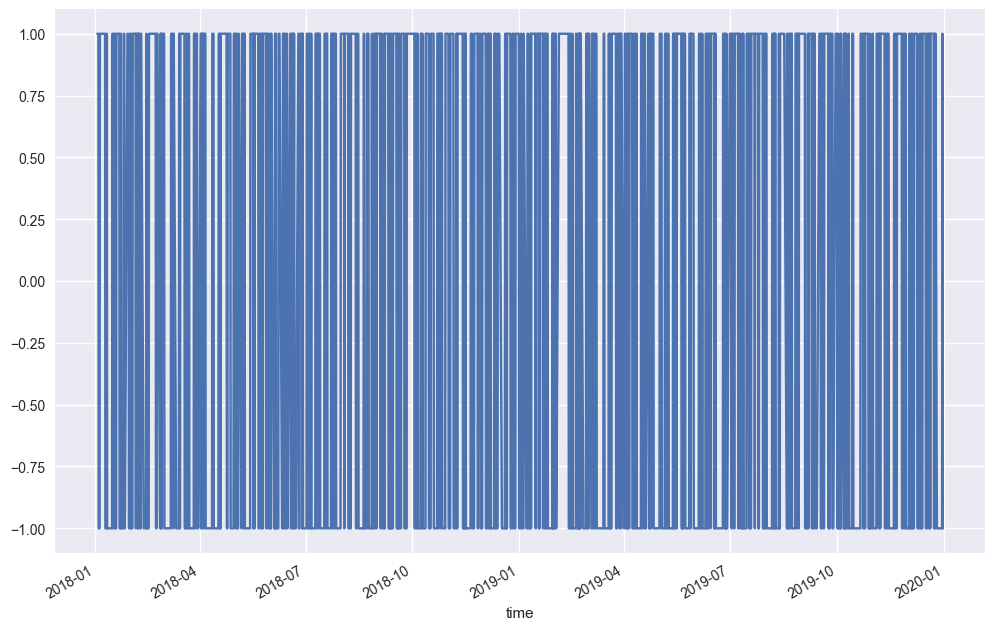

In [82]:
data.loc[:, "position"].plot(figsize = (12 , 8))
plt.show() # position 변경이 매우 빈번하게 일어난다.

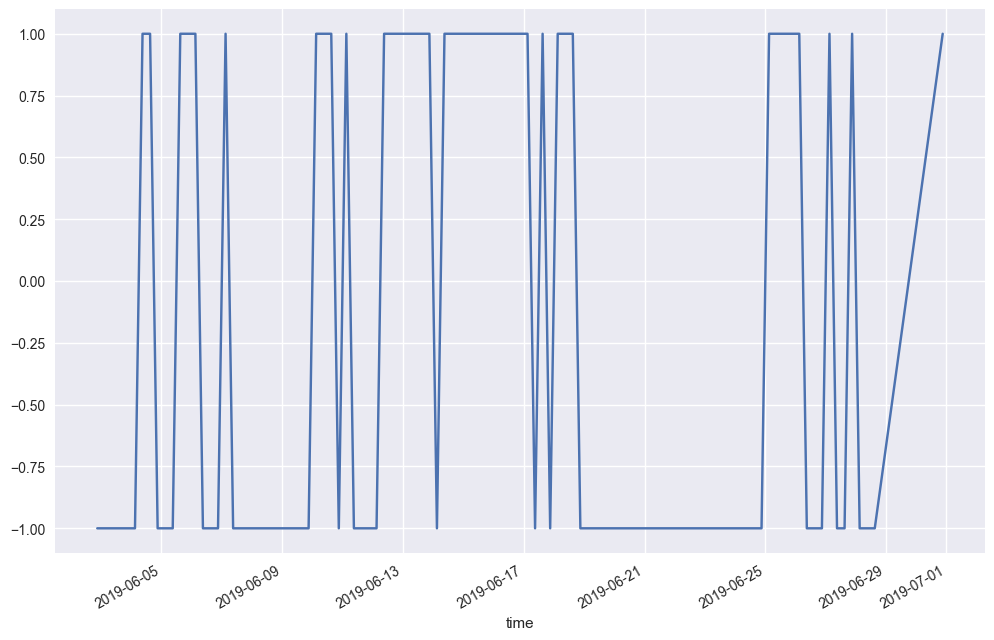

In [84]:
data.loc["2019-06", "position"].plot(figsize = (12 , 8))
plt.show() # 한달해 약 20번의 position 변경이 일어난다. => 매우 빈번

__Trading/Transaction Costs__ (simplified)

In [85]:
spread = 1.5 * 0.0001 # pips == fourth price decimal 10^(-4)
# 1.5 -> 평균 스프레드(거래자 이익)
spread

0.00015000000000000001

In [86]:
half_spread = spread / 2 # absolute tc per trade (position change +-1)
half_spread # 거래 비용

7.500000000000001e-05

In [87]:
ptc = half_spread / data.price.mean() # proportional tc per trade (position change +-1)
ptc # position 변경했을 때 비율적 거래 비용

6.520065892008921e-05

In [89]:
data.price.mean() # 전체 가격의 평균

1.1502951234269119

In [92]:
data.tail()

,price,returns,position,strategy,creturns,cstrategy
time,,,,,,
2019-12-29 22:00:00+00:00,1.119920,0.002092,-1.0,-0.002092,0.928778,1.100591
2019-12-30 04:00:00+00:00,1.119940,0.000018,-1.0,-0.000018,0.928794,1.100572
2019-12-30 10:00:00+00:00,1.120095,0.000138,-1.0,-0.000138,0.928923,1.100420
2019-12-30 16:00:00+00:00,1.119920,-0.000156,1.0,0.000156,0.928778,1.100591
2019-12-30 22:00:00+00:00,1.120355,0.000388,-1.0,0.000388,0.929138,1.101019


In [91]:
data.position.diff().fillna(0).abs().tail() # position 변경이 일어난 횟수 -1 >> 1 로 2번 변경

time
2019-12-29 22:00:00+00:00    0.0
2019-12-30 04:00:00+00:00    0.0
2019-12-30 10:00:00+00:00    0.0
2019-12-30 16:00:00+00:00    2.0
2019-12-30 22:00:00+00:00    2.0
Name: position, dtype: float64

In [93]:
data["trades"] = data.position.diff().fillna(0).abs()

In [94]:
data.head()

,price,returns,position,strategy,creturns,cstrategy,trades
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0


In [95]:
data.trades.value_counts() # 전체 기간동안 position 변경이 553번 발생

0.0    1513
2.0     553
Name: trades, dtype: int64

## Trades and Trading Costs (Part 2)

In [96]:
data.head()

,price,returns,position,strategy,creturns,cstrategy,trades
time,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0


In [97]:
data["strategy_net"] = data.strategy - data.trades * ptc # 거래 비용 고려한 전략. 거래횟수*거래비용을 전략 수익에서 빼준다.

In [98]:
data["cstrategy_net"] = data.strategy_net.cumsum().apply(np.exp)

In [101]:
data.head()

,price,returns,position,strategy,creturns,cstrategy,trades,strategy_net,cstrategy_net
time,,,,,,,,,
2018-01-02 22:00:00+00:00,1.204690,-0.000921,1.0,0.000921,0.999079,1.000921,0.0,0.000921,1.000921
2018-01-03 04:00:00+00:00,1.203825,-0.000718,1.0,-0.000718,0.998362,1.000203,0.0,-0.000718,1.000203
2018-01-03 10:00:00+00:00,1.202355,-0.001222,1.0,-0.001222,0.997143,0.998981,0.0,-0.001222,0.998981
2018-01-03 16:00:00+00:00,1.201445,-0.000757,1.0,-0.000757,0.996388,0.998225,0.0,-0.000757,0.998225
2018-01-03 22:00:00+00:00,1.201450,0.000004,1.0,0.000004,0.996392,0.998229,0.0,0.000004,0.998229


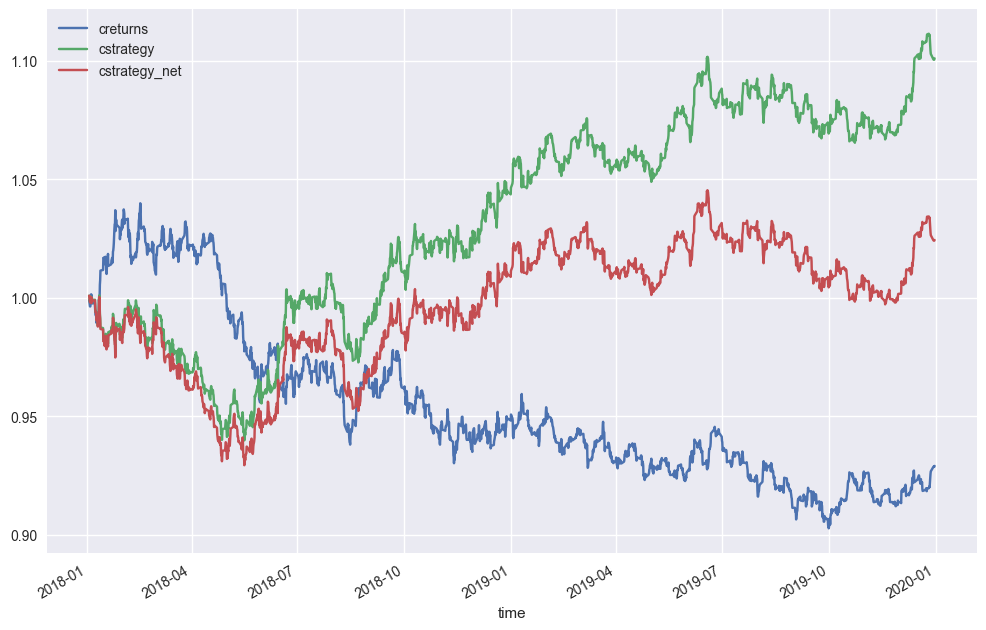

In [102]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()